In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [1]:
# prompt: drive mount code

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/statistic/data.csv', encoding='latin-1')

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


EDA, Conjectures

In [4]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
print(f'Shape of the dataset: {data.shape}')

Shape of the dataset: (541909, 8)


In [6]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:

print(f'Number of Unique Invoice = {len(data["InvoiceNo"].unique())}')
print(f'Number of Unique Stock Code = {len(data["StockCode"].unique())}')
print(f'Number of Unique Product = {len(data["Description"].unique())}')
print(f'Number of Unique Customer = {len(data["CustomerID"].unique())}')
print(f'Number of Unique Country = {len(data["Country"].unique())}')
print(f'Number of Unique Invoice Date = {len(data["InvoiceDate"].unique())}')
print(f'Number of Unique Unit Price = {len(data["UnitPrice"].unique())}')

Number of Unique Invoice = 25900
Number of Unique Stock Code = 4070
Number of Unique Product = 4224
Number of Unique Customer = 4373
Number of Unique Country = 38
Number of Unique Invoice Date = 23260
Number of Unique Unit Price = 1630


In [8]:

print(f"The number of missed values in dataset by each column:\n {data.isna().sum()}")

The number of missed values in dataset by each column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:

print("Duplicate Rows:\n")
data[data.duplicated()]

Duplicate Rows:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


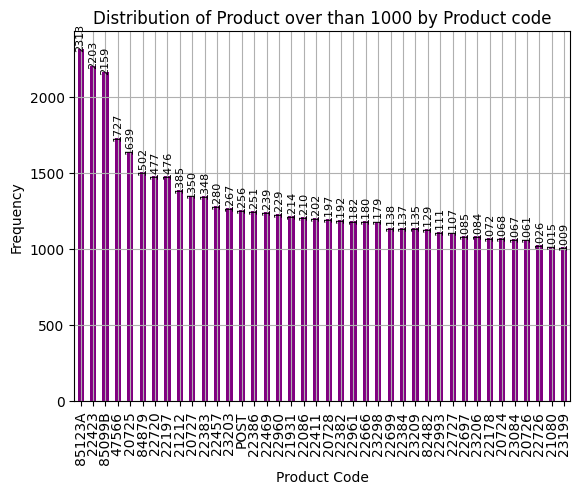

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

stock_distribution = data['StockCode'].value_counts()

stocks = stock_distribution[stock_distribution > 1000]

ax = stocks.plot(kind='bar',color='purple')

for i,v in enumerate(stocks):
  ax.text(i, v+0.1, str(v), ha='center', fontsize=8, rotation=90)

plt.xlabel('Product Code')
plt.ylabel('Frequency')
plt.title('Distribution of Product over than 1000 by Product code')
plt.grid(True)
plt.show()


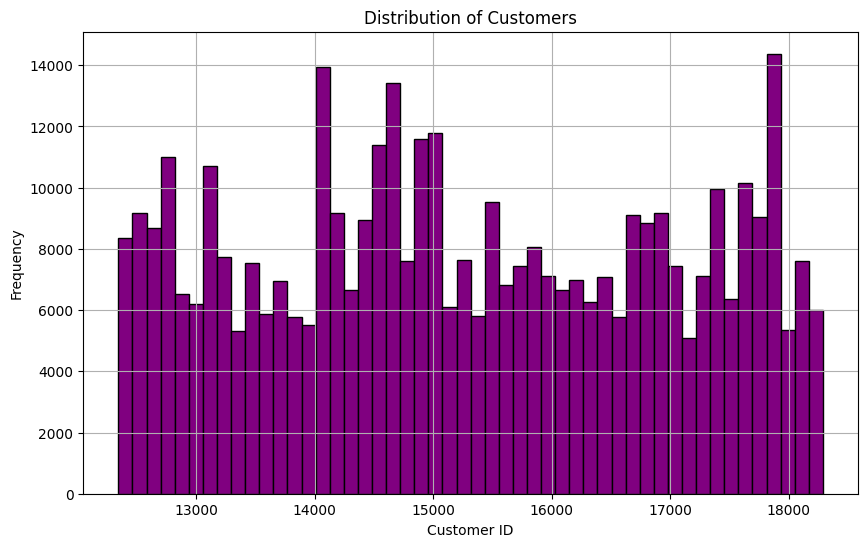

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data["CustomerID"], bins=50, color='purple', edgecolor='black')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title('Distribution of Customers')
plt.grid(True)
plt.show()

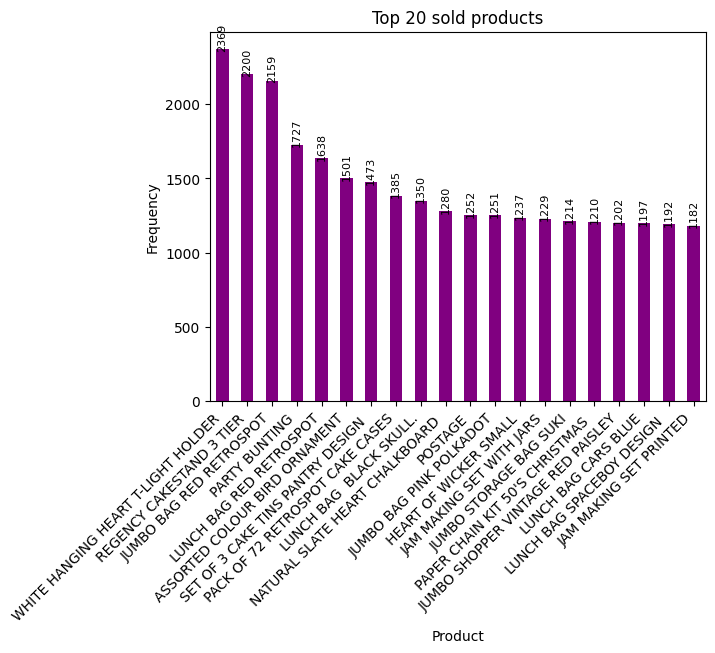

In [12]:
product_distribution = data['Description'].value_counts()

products = product_distribution[product_distribution > 1000]

top_10_products = products.nlargest(20)

ax = top_10_products.plot(kind='bar',color='purple')

for i,v in enumerate(top_10_products):
  ax.text(i, v+0.1, str(v), ha='center', fontsize=8, rotation=90)

plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 20 sold products')
#plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

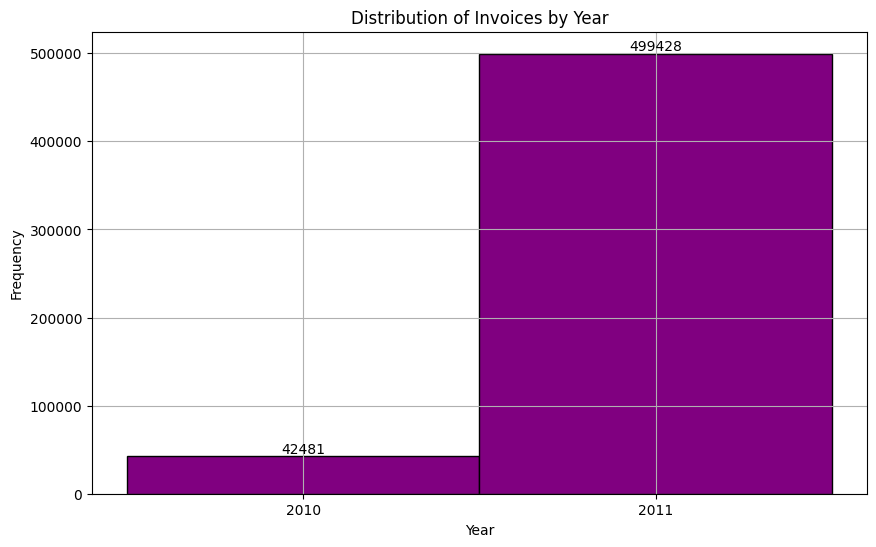

In [13]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Time'] = data['InvoiceDate'].dt.time
data['Weekday'] = data['InvoiceDate'].dt.weekday
min_year = int(data['Year'].min())
max_year = int(data['Year'].max())

bin_edges = np.arange(min_year - 0.5, max_year + 1.5, 1)

plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data["Year"], bins=bin_edges, color='purple', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Invoices by Year')
plt.grid(True)
plt.xticks(range(min_year, max_year+1))

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i in range(len(hist)):
    plt.text(bin_centers[i], hist[i], str(int(hist[i])), ha='center', va='bottom')
plt.show()


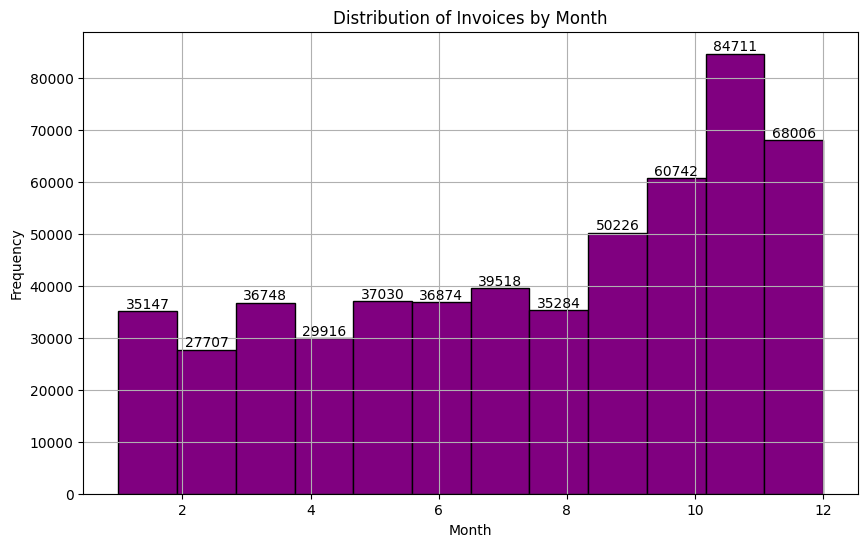

In [14]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data["Month"], bins=12, color='purple', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Invoices by Month')
plt.grid(True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i in range(len(hist)):
    plt.text(bin_centers[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

plt.show()

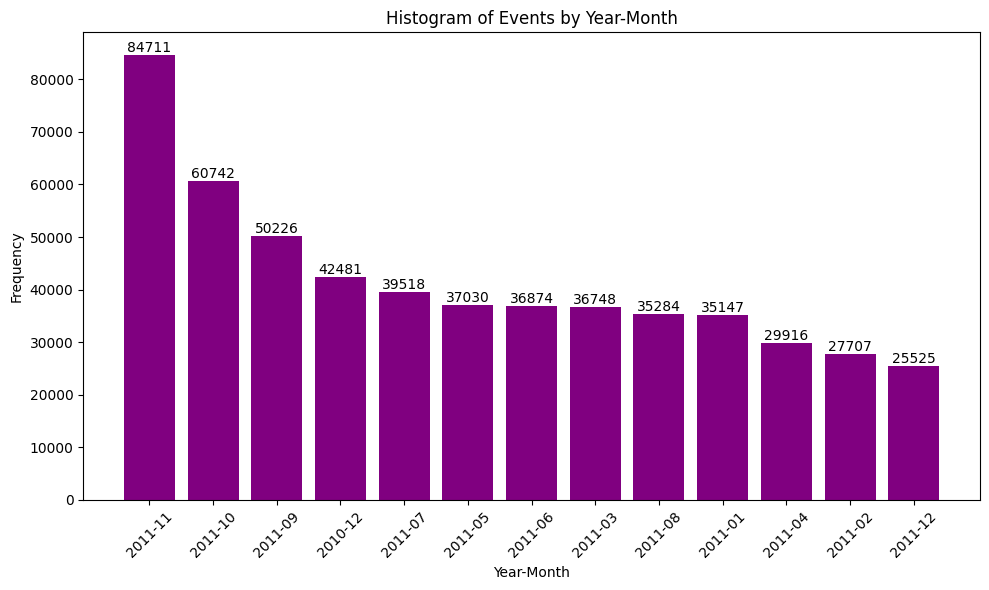

In [15]:
data['YearMonth'] = data['Year'].astype(str) + '-' + data['Month'].astype(str).str.zfill(2)

hist_data = data['YearMonth'].value_counts().reset_index()
hist_data.columns = ['YearMonth', 'Count']

plt.figure(figsize=(10, 6))
bars = plt.bar(hist_data['YearMonth'], hist_data['Count'], color='purple')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Histogram of Events by Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

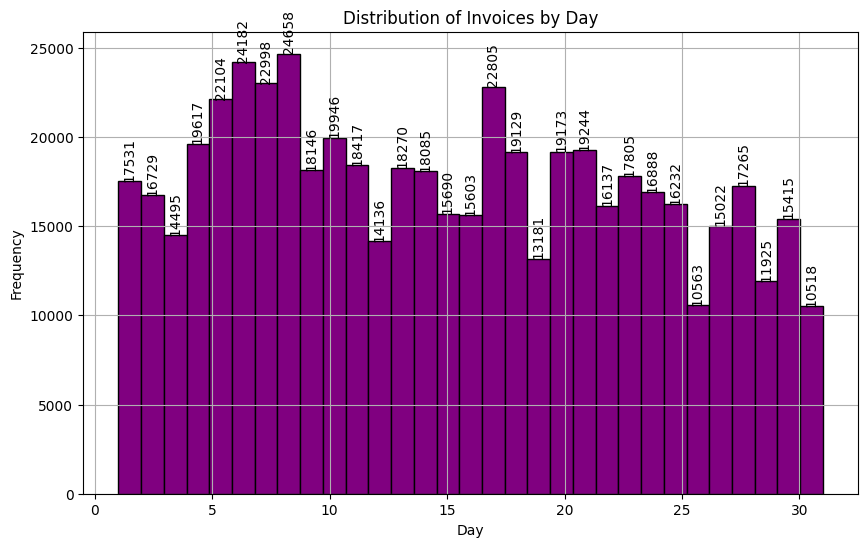

In [16]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data["Day"], bins=31, color='purple', edgecolor='black')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Invoices by Day')
plt.grid(True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i in range(len(hist)):
    plt.text(bin_centers[i], hist[i], str(int(hist[i])), ha='center', va='bottom', rotation=90)
plt.show()

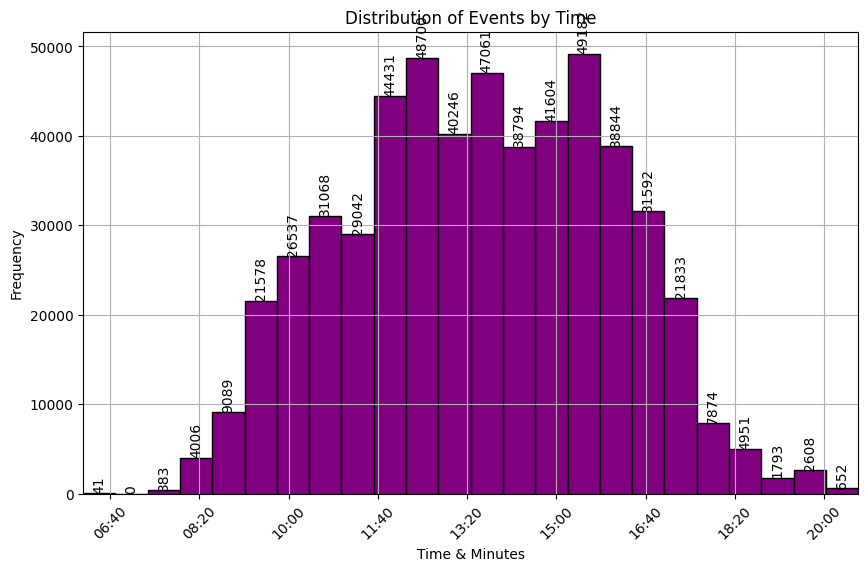

In [17]:
import matplotlib.ticker as ticker

data['Minutes']=data['Time'].apply(lambda x: x.hour * 60 + x.minute)

def format_minutes(x, pos):
    hours = int(x / 60)
    minutes = int(x % 60)
    return f'{hours:02d}:{minutes:02d}'

plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data['Minutes'], bins=24, color='purple', edgecolor='black')
plt.xlabel('Time & Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Events by Time')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_minutes))
plt.xlim(min(data['Minutes']), max(data['Minutes']))
plt.xticks(rotation=45)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i in range(len(hist)):
    plt.text(bin_centers[i], hist[i], str(int(hist[i])), ha='center', va='bottom', rotation=90)
plt.grid(True)
plt.show()


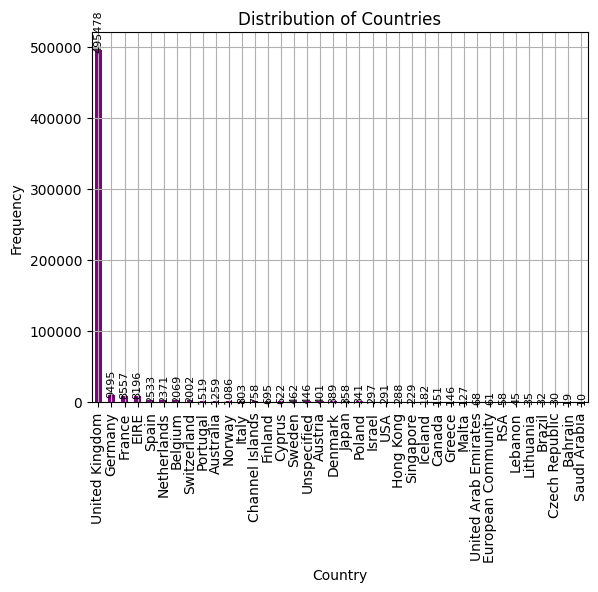

In [18]:
country_distribution = data['Country'].value_counts()

ax = country_distribution.plot(kind='bar',color='purple')

for i,v in enumerate(country_distribution):
  ax.text(i, v+0.1, str(v), ha='center', fontsize=8, rotation=90)

plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Distribution of Countries')
plt.grid(True)
plt.show()

In [19]:
# check price that less than 0
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Weekday,YearMonth,Minutes
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011,8,12,14:51:00,4,2011-08,891
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011,8,12,14:52:00,4,2011-08,892


In [20]:
# clean data
data = data[data['UnitPrice'] >= 0]
min_price = data['UnitPrice'].min()
max_price = data['UnitPrice'].max()
print(f'Minimum unit price {min_price}')
print(f'Maximum unit price {max_price}')

Minimum unit price 0.0
Maximum unit price 38970.0


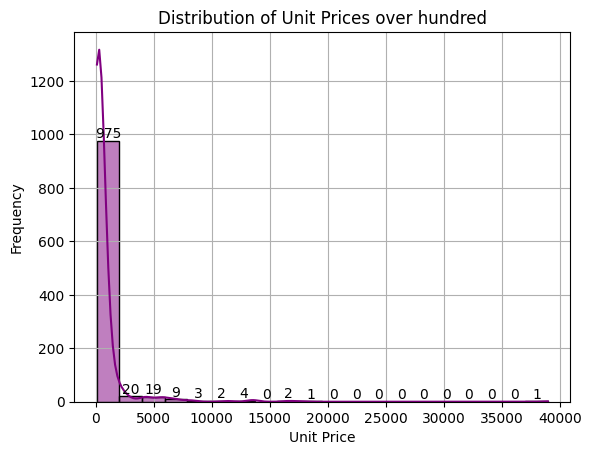

In [21]:
import seaborn as sns

data_grtr_hun=data[data["UnitPrice"]>100]
ax = sns.histplot(data_grtr_hun["UnitPrice"], bins=20, kde=True, color='purple')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Prices over hundred')
plt.grid(True)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height, int(height), ha='center', va='bottom')

plt.show()

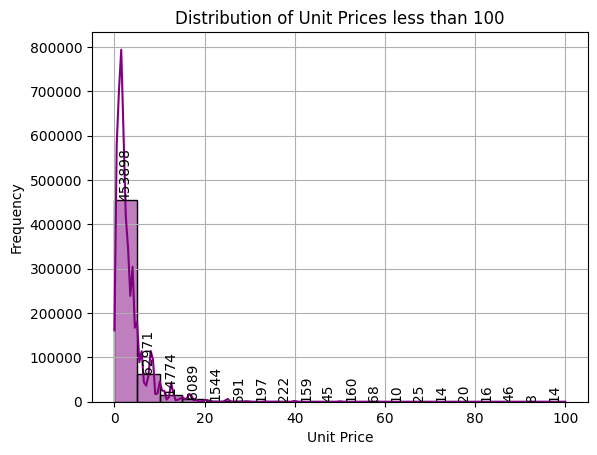

In [22]:
data_less_hun=data[data["UnitPrice"]<=100]
ax = sns.histplot(data_less_hun["UnitPrice"], bins=20, kde=True, color='purple')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Prices less than 100')
plt.grid(True)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height, int(height), ha='center', va='bottom', rotation=90)

plt.show()

In [23]:
min_quantity = data['Quantity'].min()
max_quantity = data['Quantity'].max()
print(f'Min quantity ={min_quantity}')
print(f'Max quantity ={max_quantity}')
data[data['Quantity']<0]

Min quantity =-80995
Max quantity =80995


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Weekday,YearMonth,Minutes
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1,09:41:00,2,2010-12,581
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1,09:49:00,2,2010-12,589
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1,10:24:00,2,2010-12,624
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1,10:24:00,2,2010-12,624
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1,10:24:00,2,2010-12,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,9,09:57:00,4,2011-12,597
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9,10:28:00,4,2011-12,628
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9,11:57:00,4,2011-12,717
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,9,11:58:00,4,2011-12,718


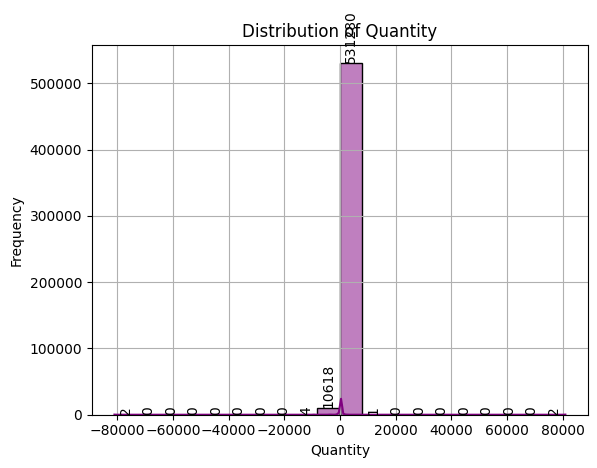

In [24]:
ax = sns.histplot(data["Quantity"], bins=20, kde=True, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.grid(True)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height, int(height), ha='center', va='bottom', rotation=90)

plt.show()

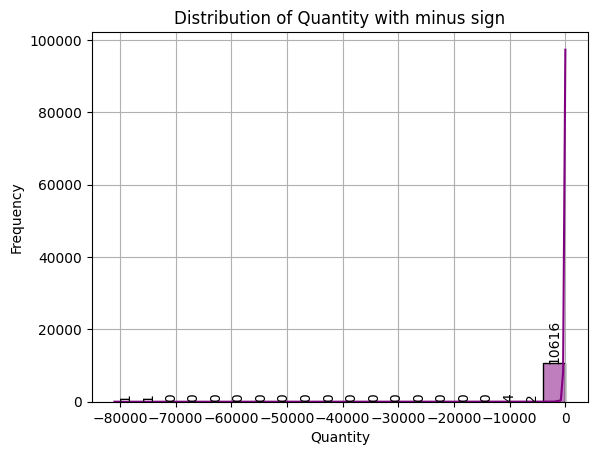

In [25]:
data_less_than0=data[data['Quantity']<0]
ax = sns.histplot(data_less_than0["Quantity"], bins=20, kde=True, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity with minus sign')
plt.grid(True)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height, int(height), ha='center', va='bottom', rotation=90)

plt.show()

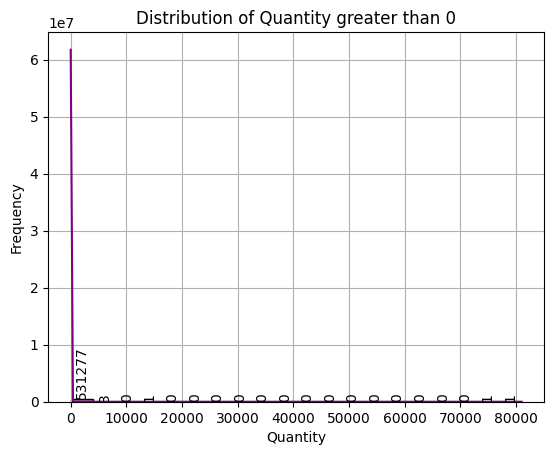

In [26]:
data_grtr_than0=data[data['Quantity']>=0]
ax = sns.histplot(data_grtr_than0["Quantity"], bins=20, kde=True, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity greater than 0')
plt.grid(True)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height, int(height), ha='center', va='bottom', rotation=90)

plt.show()

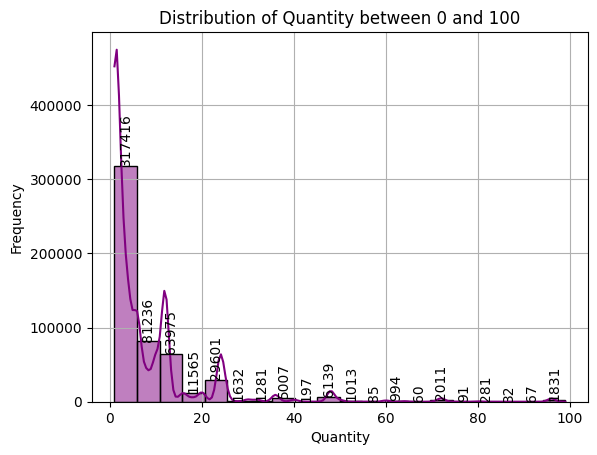

In [27]:
data_less_than100 = data[(data['Quantity'] < 100) & (data['Quantity'] >= 0)]
ax = sns.histplot(data_less_than100["Quantity"], bins=20, kde=True, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity between 0 and 100')
plt.grid(True)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height, int(height), ha='center', va='bottom', rotation=90)

plt.show()

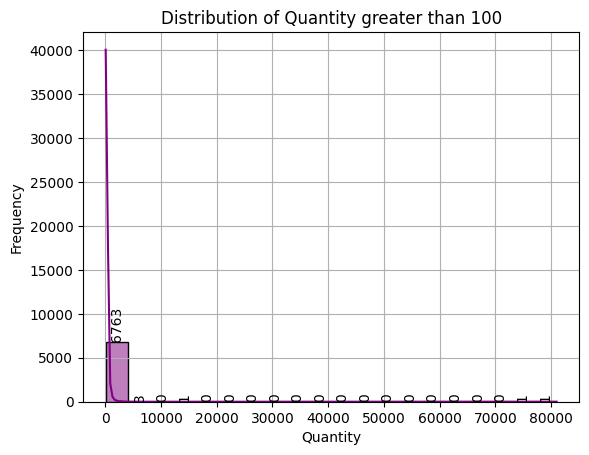

In [28]:
data_grtr_than100=data[data['Quantity']>=100]
ax = sns.histplot(data_grtr_than100["Quantity"], bins=20, kde=True, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity greater than 100')
plt.grid(True)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., height, int(height), ha='center', va='bottom', rotation=90)

plt.show()

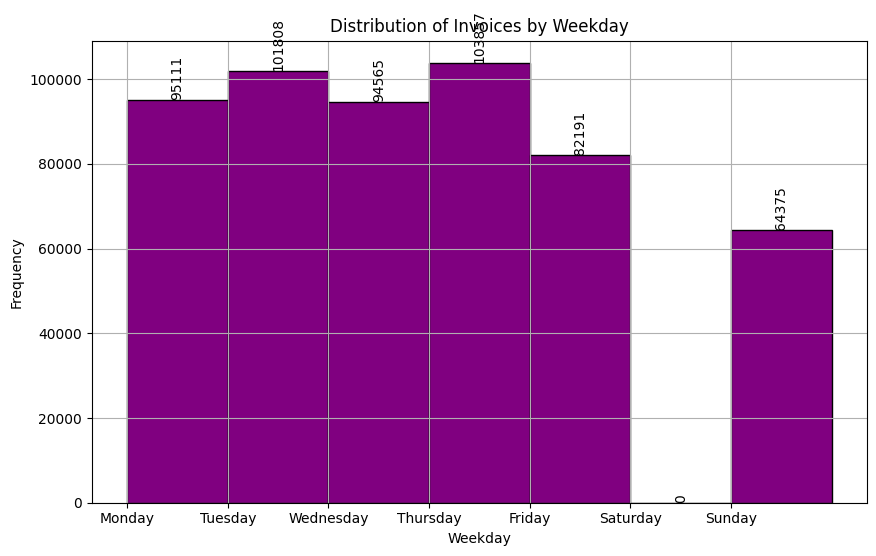

In [29]:
from datetime import datetime

plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data['Weekday'], bins=range(8), color='purple', edgecolor='black')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Distribution of Invoices by Weekday')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i in range(len(hist)):
    plt.text(bin_centers[i], hist[i], str(int(hist[i])), ha='center', va='bottom', rotation=90)

plt.show()

In [30]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Weekday_name'] = data['Weekday'].apply(lambda x: weekday_names[x])
order_dow_count = pd.DataFrame(data['Weekday_name'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])).reset_index()
order_dow_count

,Weekday_name,count
0,Monday,95111.0
1,Tuesday,101808.0
2,Wednesday,94565.0
3,Thursday,103857.0
4,Friday,82191.0
5,Saturday,NaN
6,Sunday,64375.0


Data Preprocessesing steps and Prepartion

In [32]:
data['CustomerID'].fillna(data['CustomerID'].mode()[0], inplace=True)  # Imputing with the mode

  Encoding categorical variables

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['StockCode'] = encoder.fit_transform(data['StockCode'])
data['Description'] = encoder.fit_transform(data['Description'].astype(str))  # Convert NaN to str if present
data['Country'] = encoder.fit_transform(data['Country'])


In [34]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Weekday,YearMonth,Minutes,Weekday_name
0,536365,3536,3918,6,2010-12-01 08:26:00,2.55,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
1,536365,2794,3926,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
2,536365,3044,913,8,2010-12-01 08:26:00,2.75,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
3,536365,2985,1910,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
4,536365,2984,2911,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday


# Remove any anomalies or outliers (example for 'Quantity' and 'UnitPrice')

In [35]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

#Models

# Split the dataset into training and testing sets

In [36]:
X = data[[
    'InvoiceNo', 'StockCode', 'Description','InvoiceDate','UnitPrice', 'CustomerID', 'Country']]
Y = data['Quantity']

In [37]:
x_train , y_train , x_test , y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [38]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Weekday,YearMonth,Minutes,Weekday_name
0,536365,3536,3918,6,2010-12-01 08:26:00,2.55,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
1,536365,2794,3926,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
2,536365,3044,913,8,2010-12-01 08:26:00,2.75,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
3,536365,2985,1910,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
4,536365,2984,2911,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday


# Product Recommendation

In [ ]:
# Now, we create the user-item matrix using scipy csr_matrix
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Create the mapping function
def create_matrix(df):
    N = len(df['InvoiceNo'].unique())
    M = len(df['StockCode'].unique())

    # Map Ids to indices
    order_mapper = dict(zip(np.unique(df["InvoiceNo"]), list(range(N))))
    product_mapper = dict(zip(np.unique(df["StockCode"]), list(range(M))))

    # Map indices to IDs
    order_inv_mapper = dict(zip(list(range(N)), np.unique(df["InvoiceNo"])))
    product_inv_mapper = dict(zip(list(range(M)), np.unique(df["StockCode"])))

    order_index = [order_mapper[i] for i in df['InvoiceNo']]
    product_index = [product_mapper[i] for i in df['StockCode']]

    X = csr_matrix((df["Minutes"], (product_index, order_index)), shape=(M, N))

    return X, order_mapper, product_mapper, order_inv_mapper, product_inv_mapper

# Create matrix and mappings
X, order_mapper, product_mapper, order_inv_mapper, product_inv_mapper = create_matrix(data)

# Finding similar products using the KNN Classifier
def find_similar_products(product_id, X, k, metric='cosine', show_distance=False):
    neighbour_ids = []

    product_ind = product_mapper[product_id]  # Get the index for the product
    product_vec = X[product_ind]  # Get the sparse matrix row for the product

    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)  # Initialize KNN
    kNN.fit(X)  # Fit KNN

    product_vec = product_vec.reshape(1, -1)  # Reshape for KNN compatibility
    neighbour = kNN.kneighbors(product_vec, return_distance=show_distance)  # Find neighbors

    # Loop from 1 (skipping the first) only if neighbors are sufficient

    if len(neighbour[0]) > 1:
      for i in range(1, min(k, len(neighbour[0]))):
                n = neighbour[0][i]
                neighbour_ids.append(product_inv_mapper[n])

    return neighbour_ids

In [ ]:
 # Define product code
StockCode = '85123A'

# Find similar products
similar_ids = find_similar_products(StockCode, X, k=5)

# Corrected row indexing
product_idN = data[data['StockCode'] == StockCode].iloc[0]  # Correctly locate based on StockCode

# Print selections and mapping
print(f"Since you bought a {product_idN['Description']}, here are some similar options:")

# Loop through similar_ids and locate the correct rows
for i in similar_ids:
    # Corrected row indexing based on StockCode
    product_mapped = data[data['StockCode'] == i].iloc[0]  # Locate by unique key
    print(product_mapped['Description'])

Since you bought a WHITE HANGING HEART T-LIGHT HOLDER, here are some similar options:
RED HANGING HEART T-LIGHT HOLDER
CANDLEHOLDER PINK HANGING HEART
NATURAL SLATE HEART CHALKBOARD 
HEART OF WICKER SMALL


Top products

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

prod_desc = []
for val in data['Description']:
    prod_desc.append(val)

prod_desc = " ".join(prod_desc)
prod_tokens = word_tokenize(prod_desc)

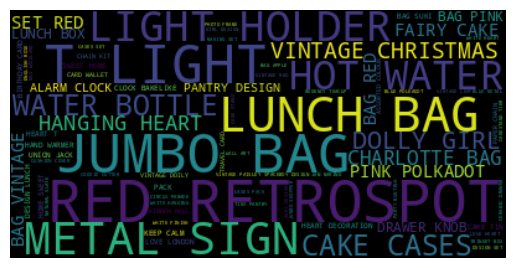

In [ ]:
import matplotlib.pyplot as plt
wc = WordCloud().generate(prod_desc)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# T-SNE

In [ ]:
df =data.drop(columns=['Description', 'InvoiceDate', 'StockCode'])
df = df.dropna()
df.head(2)

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country
0,536365,6,2.55,17850.0,United Kingdom
1,536365,6,3.39,17850.0,United Kingdom


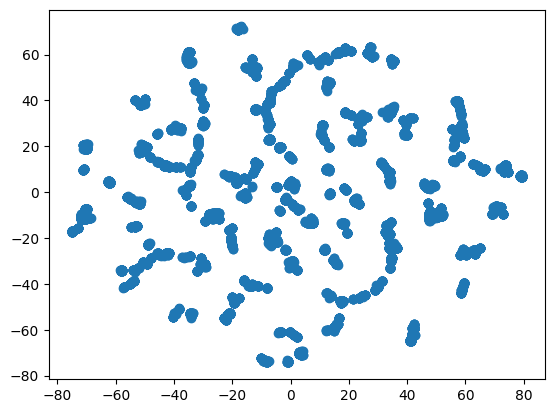

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

df.to_numpy;
tsne = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=80);

results = tsne.fit_transform(df[:10000])
results.shape
plt.scatter(results[:,0] , results[:,1])

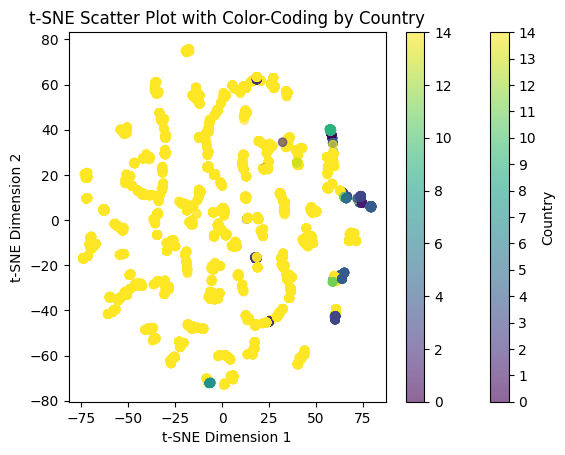

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=80)
selected_columns = ['InvoiceNo', 'CustomerID', 'Quantity', 'UnitPrice']

df_subset = df[selected_columns][:10000]
results = tsne.fit_transform(df_subset)
color_labels = label_encoder.fit_transform(df['Country'][:10000])

plt.scatter(results[:, 0], results[:, 1], c=color_labels, cmap='viridis', alpha=0.6)
plt.colorbar(ticks=range(len(label_encoder.classes_)), label='Country')

plt.colorbar()
plt.title('t-SNE Scatter Plot with Color-Coding by Country')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Customer Clustering

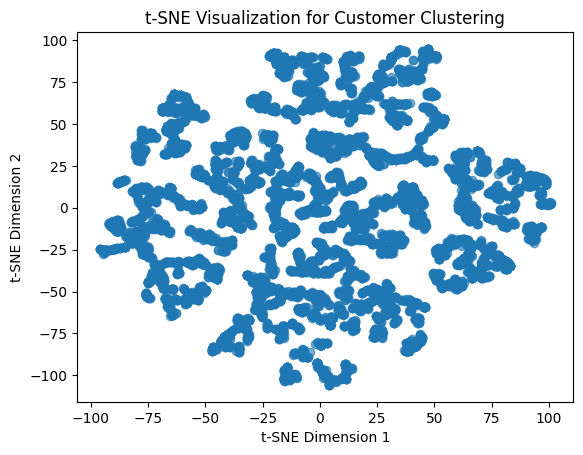

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


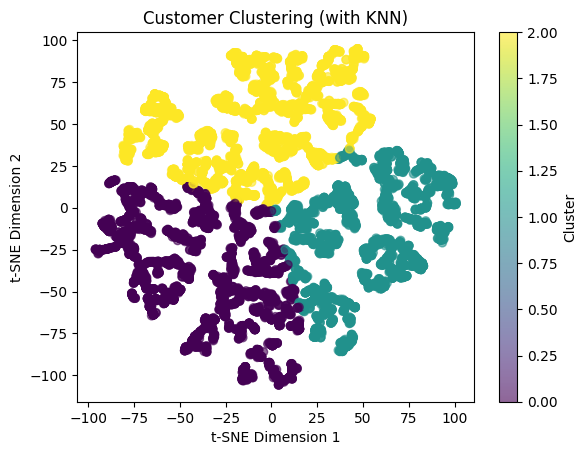

In [ ]:
# Customer clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df[['InvoiceNo', 'CustomerID', 'Quantity', 'UnitPrice']])

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='random', random_state=42)
results = tsne.fit_transform(df_normalized[:10000])

plt.scatter(results[:, 0], results[:, 1], alpha=0.6)
plt.title('t-SNE Visualization for Customer Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(results)

# Plot with cluster labels
plt.scatter(results[:, 0], results[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('Customer Clustering (with KNN)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [39]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Weekday,YearMonth,Minutes,Weekday_name
0,536365,3536,3918,6,2010-12-01 08:26:00,2.55,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
1,536365,2794,3926,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
2,536365,3044,913,8,2010-12-01 08:26:00,2.75,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
3,536365,2985,1910,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday
4,536365,2984,2911,6,2010-12-01 08:26:00,3.39,17850.0,36,2010,12,1,08:26:00,2,2010-12,506,Wednesday


In [48]:

X = data.drop(['InvoiceNo', 'InvoiceDate', 'Time', 'YearMonth', 'Weekday_name'], axis=1)
y = data['Quantity']

# Convert 'CustomerID' to int (it's currently float and has .0 suffix which is unnecessary)
data['CustomerID'] = data['CustomerID'].astype('int')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [49]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')


Mean Squared Error (MSE): 1.214725820356346
R-squared (R^2): 0.9992078643624281


In [50]:
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for name, importance in sorted_features:
    print(f"{name}: {importance:.4f}")


Feature Importances:
Quantity: 0.8959
CustomerID: 0.1031
Minutes: 0.0003
Day: 0.0002
Weekday: 0.0001
Description: 0.0001
Month: 0.0001
StockCode: 0.0001
UnitPrice: 0.0001
Year: 0.0000
Country: 0.0000


In [53]:
data["Sales"] = data.Quantity * data.UnitPrice
data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Weekday"] = data.InvoiceDate.dt.weekday
data["Day"] = data.InvoiceDate.dt.day
data["Dayofyear"] = data.InvoiceDate.dt.dayofyear
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [58]:
grouped_features = ["Date", "Year", "Quarter","Month", "Weekday", "Dayofyear", "Day",
                    "StockCode"]

In [61]:
daily_data = pd.DataFrame(data.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Sales"] = data.groupby(grouped_features).Sales.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

,Date,Year,Quarter,Month,Weekday,Dayofyear,Day,StockCode,Quantity,Sales
0,2010-12-01,2010,4,12,2,335,1,0,60,51.00
1,2010-12-01,2010,4,12,2,335,1,7,2,1.70
2,2010-12-01,2010,4,12,2,335,1,8,5,4.25
3,2010-12-01,2010,4,12,2,335,1,10,1,2.51
4,2010-12-01,2010,4,12,2,335,1,11,3,10.08


In [62]:
low_quantity = daily_data.Quantity.quantile(0.01)
high_quantity = daily_data.Quantity.quantile(0.99)
print((low_quantity, high_quantity))

(1.0, 209.0)


In [65]:
low_Sales = daily_data.Sales.quantile(0.01)
high_Sales = daily_data.Sales.quantile(0.99)
print((low_Sales, high_Sales))

(0.79, 387.0917999999982)


we are using only target ranges data that are occupied by 90 % of the data entries. This is a first and easy strategy to exclude heavy outliers but we should always be aware of the fact that we have lost some information given by the remaining % we have excluded. It could be nice and useful in general to understand and analyse what has caused these outliers

In [66]:
samples = daily_data.shape[0]

In [69]:
daily_data = daily_data.loc[
    (daily_data.Quantity >= low_quantity) & (daily_data.Quantity <= high_quantity)]
daily_data = daily_data.loc[
    (daily_data.Sales >= low_Sales) & (daily_data.Sales <= high_Sales)]

How much entries have we lost?

In [70]:
samples - daily_data.shape[0]

6839

 a look at the remaining distributions of daily quantities:

<ipython-input-71-25066f3cc1b7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_data.Quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
<ipython-input-71-25066f3cc1b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(daily_data.Quantity.values), kde=True, ax=ax[1], colo

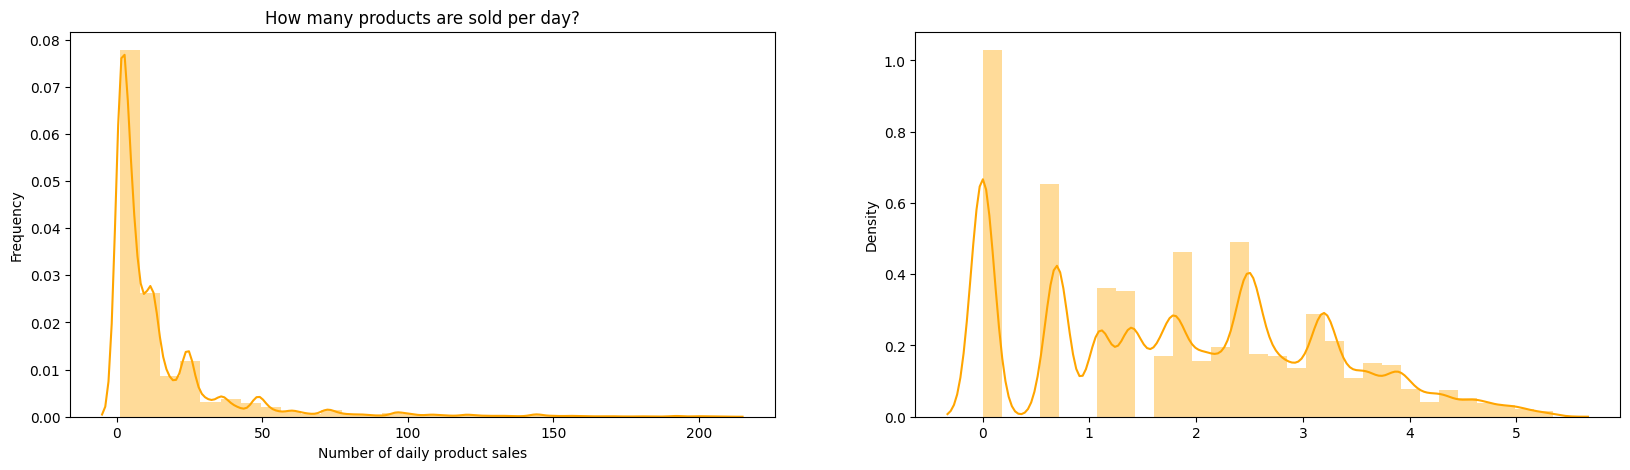

In [71]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data.Quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
sns.distplot(np.log(daily_data.Quantity.values), kde=True, ax=ax[1], color="Orange", bins=30);
ax[0].set_xlabel("Number of daily product sales");
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many products are sold per day?");

In addition the daily sales quantities seem to be multimodal. A daily sale of 1 is common as well as a quantity of 12 and 24. This pattern is very interesting and leads to the conclusion that quantities are often divisible by 2 or 3. In a nutshell we can say that specific products are often bought as single quantites or in a small bunch.

In [42]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
from sklearn.svm import SVR

X = data[['StockCode', 'Description', 'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day', 'Minutes']]
y = data['Quantity']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import numpy as np


sample_size = int(len(X_train_scaled) * 0.1)
indices = np.random.choice(range(len(X_train_scaled)), size=sample_size, replace=False)
X_train_sample = X_train_scaled[indices]
y_train_sample = y_train.iloc[indices]

fast_svr = SVR(kernel='rbf', C=10, gamma='auto', epsilon=0.1)
fast_svr.fit(X_train_sample, y_train_sample)


SVR(C=10, gamma='auto')

In [47]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = fast_svr.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 1525.2932527570138
R-squared (R²): 0.005340033932685451


In [94]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=7)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50,
          verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
import pandas as pd
import numpy as np

# Number of future data points
num_days = 30  #  predict for the next 30 days


last_known_date = pd.to_datetime('2011-12-01')
future_dates = pd.date_range(start=last_known_date + pd.Timedelta(days=1), periods=num_days, freq='D')


In [116]:



future_data = pd.DataFrame({
    'Date': future_dates,
    'StockCode': np.random.choice(data['StockCode'], size=num_days, replace=True),
    'Description': np.random.choice(data['Description'], size=num_days, replace=True),
    'Quantity': np.random.randint(1, 30, size=num_days),  # Random quantity between 1 and 30
    'UnitPrice': np.random.choice(data['UnitPrice'], size=num_days, replace=True),
    'CustomerID': np.random.choice(data['CustomerID'], size=num_days, replace=True),
    'Country': np.random.choice(data['Country'], size=num_days, replace=True),
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Weekday': future_dates.weekday,
    'Minutes': np.random.randint(0, 1440, size=num_days)  # Assuming minutes past midnight
})


In [117]:

future_data['StockCode'] = future_data['StockCode'].astype(int)
future_data['Description'] = future_data['Description'].astype(int)
future_data['CustomerID'] = future_data['CustomerID'].astype(int)
future_data['Country'] = future_data['Country'].astype(int)


In [118]:

future_data.to_csv('future_sales_data.csv', index=False)



In [121]:
future_sales_predictions = model.predict(future_data.drop('Date', axis=1))
print(future_sales_predictions)


[ 3.0002828 20.108734  30.38981   18.019226  16.010695  17.514597
 18.258589  12.018195  20.082117  16.539246   6.997633  10.000793
  4.0008445 25.336887  24.029081  18.019835   7.55254    4.996451
 24.767948  12.025711   8.992884  20.122166   6.997793  19.06145
  9.997221  10.058715  18.53852   16.2592    18.01989   12.439776 ]


In [120]:
future_data.dtypes

Date           datetime64[ns]
StockCode               int64
Description             int64
Quantity                int64
UnitPrice             float64
CustomerID              int64
Country                 int64
Year                    int32
Month                   int32
Day                     int32
Weekday                 int32
Minutes                 int64
dtype: object

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

future_data['Predicted_Quantity'] = [3.0002828, 20.108734, 30.38981, 18.019226, 16.010695, 17.514597,
                                     18.258589, 12.018195, 20.082117, 16.539246, 6.997633, 10.000793,
                                     4.0008445, 25.336887, 24.029081, 18.019835, 7.55254, 4.996451,
                                     24.767948, 12.025711, 8.992884, 20.122166, 6.997793, 19.06145,
                                     9.997221, 10.058715, 18.53852, 16.2592, 18.01989, 12.439776]


In [128]:
# Group by 'Month' and sum the predicted quantities
Daily_sales_predictions = future_data.groupby('Day')['Predicted_Quantity'].sum().reset_index()


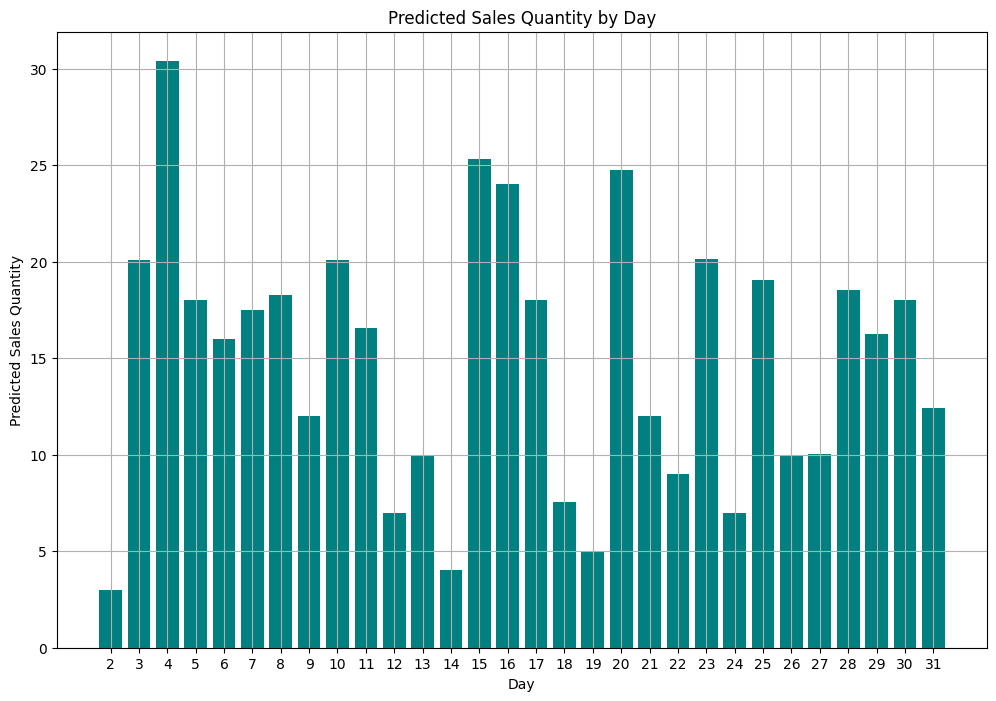

In [131]:
plt.figure(figsize=(12, 8))
plt.bar(Daily_sales_predictions['Day'], Daily_sales_predictions['Predicted_Quantity'], color='teal')
plt.xlabel('Day',)
plt.ylabel('Predicted Sales Quantity')
plt.title('Predicted Sales Quantity by Day')

plt.xticks(Daily_sales_predictions['Day'])
plt.grid(True)
plt.show()


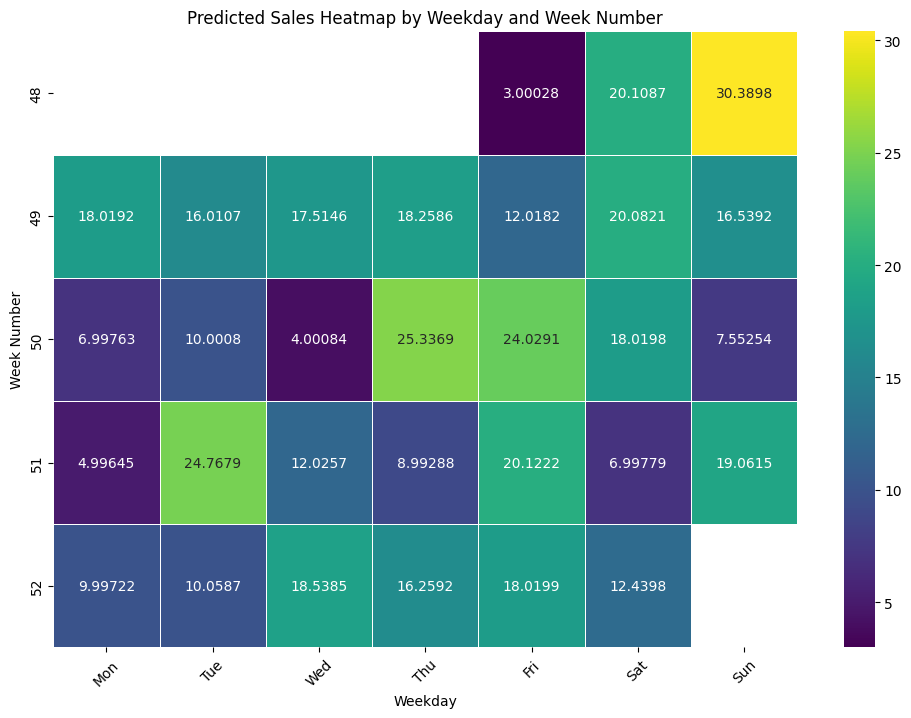

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax = sns.heatmap(weekly_sales, annot=True, cmap='viridis', linewidths=.5, fmt='g')
ax.set_title('Predicted Sales Heatmap by Weekday and Week Number')
ax.set_xlabel('Weekday')
ax.set_ylabel('Week Number')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xticks(rotation=45)
plt.show()
